In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import pos_tag, pos_tag_sents

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import pandas as pd

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Download necessary NLTK data
# nltk.download('punkt', quiet=True)
# nltk.download('averaged_perceptron_tagger', quiet=True)
# nltk.download('wordnet', quiet=True)
# nltk.download('stopwords', quiet=True)
# nltk.download('sentiwordnet', quiet=True)

In [118]:

# Read the CSV file, skipping bad lines
df = pd.read_csv("saloon_df.csv", on_bad_lines='skip')


C:\Users\ACER\AppData\Local\Temp\ipykernel_4204\3916648153.py:2: DtypeWarning: Columns (16,17,26,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("saloon_df.csv", on_bad_lines='skip')


In [119]:
df = df[['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state']]

In [120]:
df = df[df['is_open']!=0]

In [121]:
df.shape

(14066, 12)

In [122]:
df.dropna(subset=['address'],inplace=True)

In [123]:
df.dropna(subset=['postal_code'],inplace=True)

In [124]:
counts = df['review_count'].value_counts()

In [125]:
above1000 = counts.nlargest(17).index

In [126]:
df = df[df['review_count'].isin(above1000)]

In [112]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [127]:
df['name'].value_counts().nlargest(50)

Walgreens                              291
Great Clips                            164
Supercuts                               97
Ross Dress for Less                     69
Hair Cuttery                            61
Sally Beauty Supply                     44
Kohl's                                  44
Old Navy                                37
Bath & Body Works                       35
Ulta Beauty                             25
Fantastic Sams Cut & Color              24
Men's Wearhouse                         22
JCPenney                                20
Forever 21                              20
Sun Tan City                            19
H&M                                     18
Jos A Bank                              15
Hand & Stone Massage and Facial Spa     15
Fantastic Sams Hair Salons              15
European Wax Center                     13
Victoria's Secret                       13
MAC Cosmetics                           12
Urban Outfitters                        12
Cost Cutter

In [128]:
df_f = df[~df['name'].str.contains('Walgreens')]

In [18]:
df_f['name'].value_counts().nlargest(12)

Great Clips                   164
Supercuts                      97
Ross Dress for Less            69
Hair Cuttery                   61
Sally Beauty Supply            44
Kohl's                         44
Old Navy                       37
Bath & Body Works              35
Ulta Beauty                    25
Fantastic Sams Cut & Color     24
Men's Wearhouse                22
JCPenney                       20
Name: name, dtype: int64

In [19]:
top10=df_f['name'].value_counts().nlargest(10).index

In [129]:
df = df_f[df_f['name'].isin(top10)]

In [130]:
df['review_count'].value_counts()

5     71
7     69
6     62
9     61
8     56
10    47
11    42
13    34
12    33
14    32
15    23
17    17
16    15
18    13
20    10
21     9
19     6
Name: review_count, dtype: int64

In [131]:
df.shape

(600, 12)

In [132]:
df['stars'].value_counts()

3.0    168
2.5    127
3.5    126
4.0     70
2.0     68
1.5     18
4.5     14
5.0      8
1.0      1
Name: stars, dtype: int64

In [133]:
dfr=pd.read_csv("reviews.csv", on_bad_lines='skip')

C:\Users\ACER\AppData\Local\Temp\ipykernel_4204\2829624764.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfr=pd.read_csv("reviews.csv", on_bad_lines='skip')


In [134]:
dfr.dropna(subset=['user_id'],inplace=True)
dfr.dropna(subset=['useful'],inplace=True)
dfr.dropna(subset=['review_id'],inplace=True)
dfr.dropna(subset=['date'],inplace=True)
dfr.dropna(subset=['stars'],inplace=True)
dfr.dropna(subset=['text'],inplace=True)
dfr.dropna(subset=['funny'],inplace=True)
dfr.dropna(subset=['business_id'],inplace=True)
dfr.dropna(subset=['cool'],inplace=True)

In [135]:
dfr.shape

(6657582, 9)

In [136]:
dfr.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

In [137]:
def downsize_review(review, business1):
    temp = business1['business_id'].tolist()
    review1 = review[review['business_id'].isin(temp)]
    review1 = review1[['business_id','review_id','user_id', 'stars', 'text']]
    review2 = review1.reset_index(drop=True)
    return review2

dfr = downsize_review(dfr, df)
dfr.shape

(5903, 5)

In [138]:
dfrb = pd.merge(df, dfr, on='business_id', how='left')

In [139]:
dfrb.rename(columns = {'stars_x':'business_ratings','stars_y':'user_ratings','date':'review_date'},inplace=True)

In [140]:
dfrb.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'business_ratings',
       'state', 'review_id', 'user_id', 'user_ratings', 'text'],
      dtype='object')

In [141]:
dfrb = dfrb.drop('is_open',axis=1)

In [142]:
dfrb.shape

(5903, 15)

In [143]:
dfrb = dfrb.drop('categories',axis=1)

In [152]:
dfrb.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,qwyrnk7oEKEa3q8jUGSgtA,ZhFJu-50RK6Medpb7rkf3A,1.0,Ulta has a promo: buy $60 of Purology get a fr...
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,MA8rLgEgmlZD-Oy7HZwsEg,bMGIATKbYqPu8lkyLirvBw,5.0,Let me preface my review with this: I am very ...
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,bTjp8q3xeV4sLHzryIhC_Q,LR5KLo9TkFbuLTUnQXz0xA,2.0,Two and a half stars I would say. Even though ...
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,7DqfW1qFMoXspyluOXVTGw,xOFcwFrmjwnXYjLqxk_rjQ,5.0,I visited this Ulta location twice in one week...
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,VGaUZZNhaW10xaJTPfbNew,a8_IPVUWTCIbvn-hZRFX6Q,1.0,I went here to get eyelash extensions from the...


In [153]:
dfc=pd.read_csv("checkin.csv", on_bad_lines='skip')

In [154]:
def downsize_checkin(checkin, business1):
    temp = business1['business_id'].tolist()
    checkin1 = checkin[checkin['business_id'].isin(temp)]
    checkin2 = checkin1.groupby('business_id').sum().reset_index()
    return checkin2

dfc = downsize_checkin(dfc, dfrb)
dfc.head()
dfc.shape

(585, 2)

In [155]:
dfc['checkins'] = dfc['date'].apply(lambda x: len(x.strip(', ').split(', ')) if x.strip(', ') else 0)

In [156]:
dfc = dfc.drop('date',axis=1)

In [157]:
len(dfc[dfc['checkins'] < 1]) 

0

In [158]:
dfrbc = pd.merge(dfrb,dfc,how='left',on='business_id')

In [159]:
dfrbc.shape

(5903, 15)

In [160]:
dfrbc.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'user_ratings', 'text', 'checkins'],
      dtype='object')

In [161]:
dfrbc.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text,checkins
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,qwyrnk7oEKEa3q8jUGSgtA,ZhFJu-50RK6Medpb7rkf3A,1.0,Ulta has a promo: buy $60 of Purology get a fr...,17.0
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,MA8rLgEgmlZD-Oy7HZwsEg,bMGIATKbYqPu8lkyLirvBw,5.0,Let me preface my review with this: I am very ...,17.0
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,bTjp8q3xeV4sLHzryIhC_Q,LR5KLo9TkFbuLTUnQXz0xA,2.0,Two and a half stars I would say. Even though ...,17.0
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,7DqfW1qFMoXspyluOXVTGw,xOFcwFrmjwnXYjLqxk_rjQ,5.0,I visited this Ulta location twice in one week...,17.0
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,VGaUZZNhaW10xaJTPfbNew,a8_IPVUWTCIbvn-hZRFX6Q,1.0,I went here to get eyelash extensions from the...,17.0


In [162]:
dft = pd.read_csv('tips.csv',on_bad_lines='skip')

In [163]:
dft.columns

Index(['business_id', 'compliment_count', 'date', 'text', 'user_id'], dtype='object')

In [164]:
def downsize_tip(tips, business1):
    temp = business1['business_id'].tolist()
    tip1 = tips[tips['business_id'].isin(temp)]
    tip1 = tip1[['business_id','text']]
    tip2 = tip1.reset_index(drop=True)
    return tip2
    
dft = downsize_tip(dft, dfrbc)
dft.shape

(910, 2)

In [165]:
class CleaningPipeline:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def remove_non_ascii(self, text):
        return ''.join(char for char in text if ord(char) < 128)

    def remove_whitespace_and_special_chars(self, text):
        return re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', text)).strip()

    def remove_numerics(self, text):
        return re.sub(r'\d+', '', text)

    def remove_stop_words(self, text):
        return ' '.join(word for word in text.split() if word.lower() not in self.stop_words)

    def word_lemmatization(self, text):
        return ' '.join(self.lemmatizer.lemmatize(word) for word in text.split())

    def clean_text(self, text):
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'<[^>]+>', '', text)
        text = text.lower()
        text = re.sub(r'\W', ' ', text)
        return text

    def convert_tag(self, tag):
        tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
        try:
            return tag_dict[tag[0]]
        except KeyError:
            return None

    def compute_sentiment_score(self, text):
        sentiment_score = 0
        tokens_count = 0

        cleaned_text = self.clean_text(text)
        sentences = sent_tokenize(cleaned_text)

        for sentence in sentences:
            tagged_words = nltk.pos_tag(word_tokenize(sentence))

            for word, tag in tagged_words:
                wn_tag = self.convert_tag(tag)
                if wn_tag not in ('n', 'a', 'r', 'v'):
                    continue

                lemma = self.lemmatizer.lemmatize(word, pos=wn_tag)
                if not lemma:
                    continue

                synsets = wn.synsets(lemma, pos=wn_tag)
                if not synsets:
                    continue

                swn_synset = swn.senti_synset(synsets[0].name())
                sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
                tokens_count += 1

        if tokens_count == 0:
            return 0

        final_score = sentiment_score / tokens_count

        if final_score > 0:
            return 1  # Positive
        else:
            return 0  # Neutral or Negative

    def transform(self, text):
        text = self.remove_non_ascii(text)
        text = self.remove_whitespace_and_special_chars(text)
        text = self.remove_numerics(text)
        text = self.remove_stop_words(text)
        text = self.word_lemmatization(text)
        sentiment = self.compute_sentiment_score(text)
        return text, sentiment

In [166]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

class CleaningPipeline:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def transform(self, text):
        cleaned_text = self.clean_text(text)
        polarity = self.compute_polarity(cleaned_text)
        return cleaned_text, polarity

    def clean_text(self, text):
        # Example cleaning: lowercasing and removing stopwords
        words = text.lower().split()
        words = [self.lemmatizer.lemmatize(word) for word in words if word not in self.stop_words]
        return ' '.join(words)

    def compute_polarity(self, text):
        # Example polarity computation (dummy)
        return 1 if 'good' in text else 0

# Instantiate and use the pipeline
pipeline = CleaningPipeline()
dfrbc['cleaned_text'], dfrbc['polarity'] = zip(*dfrbc['text'].apply(pipeline.transform))

print(dfrbc.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                    address             business_id    city   latitude  \
0  2130 Fashion Center Blvd  4uqRhXZTOzKF2ZhxbWzxfA  Newark  39.672058   
1  2130 Fashion Center Blvd  4uqRhXZTOzKF2ZhxbWzxfA  Newark  39.672058   
2  2130 Fashion Center Blvd  4uqRhXZTOzKF2ZhxbWzxfA  Newark  39.672058   
3  2130 Fashion Center Blvd  4uqRhXZTOzKF2ZhxbWzxfA  Newark  39.672058   
4  2130 Fashion Center Blvd  4uqRhXZTOzKF2ZhxbWzxfA  Newark  39.672058   

   longitude         name postal_code  review_count  business_ratings state  \
0   -75.6489  Ulta Beauty       19702            11               3.5    DE   
1   -75.6489  Ulta Beauty       19702            11               3.5    DE   
2   -75.6489  Ulta Beauty       19702            11               3.5    DE   
3   -75.6489  Ulta Beauty       19702            11               3.5    DE   
4   -75.6489  Ulta Beauty       19702            11               3.5    DE   

                review_id                 user_id user_ratings  \
0  qwyrnk7oEKE

In [167]:
dfrbc.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text,checkins,cleaned_text,polarity
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,qwyrnk7oEKEa3q8jUGSgtA,ZhFJu-50RK6Medpb7rkf3A,1.0,Ulta has a promo: buy $60 of Purology get a fr...,17.0,ulta promo: buy $60 purology get free gift. to...,0
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,MA8rLgEgmlZD-Oy7HZwsEg,bMGIATKbYqPu8lkyLirvBw,5.0,Let me preface my review with this: I am very ...,17.0,let preface review this: picky cut hair. trust...,0
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,bTjp8q3xeV4sLHzryIhC_Q,LR5KLo9TkFbuLTUnQXz0xA,2.0,Two and a half stars I would say. Even though ...,17.0,two half star would say. even though store new...,0
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,7DqfW1qFMoXspyluOXVTGw,xOFcwFrmjwnXYjLqxk_rjQ,5.0,I visited this Ulta location twice in one week...,17.0,visited ulta location twice one week. first ti...,0
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,VGaUZZNhaW10xaJTPfbNew,a8_IPVUWTCIbvn-hZRFX6Q,1.0,I went here to get eyelash extensions from the...,17.0,went get eyelash extension benefit cosmetic ba...,0


In [168]:
dft

,business_id,text
0,9C_aBq9VqoRF94N1TwjnQQ,got $50 in Kohl's cash--I'm rich beotch!
1,0ehETpBtO8_3N0OOIRc-QA,This place is nice. 14 dollars for my haircut...
2,6FvpuAAHD4wvvvhxi7S5IQ,Can't beat the price.
3,LMy6IQniXfymY1D81HDQ7A,Maternity in the back!
4,35I1AoSFszgU2l2_vIj1gw,Checkin before buying anything! 10% coupon pop...
...,...,...
905,coVkql0wyzNlWll6QT0_dg,Very rude smart remarks accused me of stealing...
906,u_bN8-vC8D7MvkI8RakP4Q,Excellent customer service.
907,d084G7RwrePY9MePCsGzZg,LOVE this location! The ladies are friendly & ...
908,u-TXTJexhAeGCwYcS5EE5A,This is the best place in town to buy reasonab...


In [169]:
pipeline = CleaningPipeline()
dft['cleaned_text'], dft['polarity'] = zip(*dft['text'].apply(pipeline.transform))

dft.head(50)

,business_id,text,cleaned_text,polarity
0,9C_aBq9VqoRF94N1TwjnQQ,got $50 in Kohl's cash--I'm rich beotch!,got $50 kohl's cash--i'm rich beotch!,0
1,0ehETpBtO8_3N0OOIRc-QA,This place is nice. 14 dollars for my haircut...,place nice. 14 dollar haircut. nice friendly. ...,1
2,6FvpuAAHD4wvvvhxi7S5IQ,Can't beat the price.,can't beat price.,0
3,LMy6IQniXfymY1D81HDQ7A,Maternity in the back!,maternity back!,0
4,35I1AoSFszgU2l2_vIj1gw,Checkin before buying anything! 10% coupon pop...,checkin buying anything! 10% coupon popped cou...,0
5,11Z3SPTgWIgeIJP1JCNAqw,...bought a snappy shirt...,...bought snappy shirt...,0
6,yCh_Lqdoah2CH28hD5LWUw,Smells good,smell good,1
7,nm1R94P2eXyWjgo-YK34VA,Opens @ 9:30am,open @ 9:30am,0
8,MwJ7FHmLvHFZ48Oc8OVH2A,Use the Great Clips App to know the approximat...,use great clip app know approximate wait time ...,0
9,Agb4aIkeo6UpU3uLifTVwA,:),:),0


In [170]:
dfrbc.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'user_ratings', 'text', 'checkins', 'cleaned_text',
       'polarity'],
      dtype='object')

In [171]:
def transform_review(review2):
    # Convert 'user_ratings' and 'polarity' to numeric, coercing errors to 
    review2['user_ratings'] = pd.to_numeric(review2['user_ratings'], errors='coerce')
    review2['polarity'] = pd.to_numeric(review2['polarity'], errors='coerce')
    
    # Group by 'business_id' and calculate mean, ignoring  values
    review3 = review2.groupby('business_id').agg({
        'user_ratings': lambda x: x.mean(skipna=True),
        'polarity': lambda x: x.mean(skipna=True)
    }).reset_index()
    
    # Round the results
    review3['user_ratings'] = review3['user_ratings'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)
    review3['polarity'] = review3['polarity'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)
     # Rename columns
    review3.rename(columns={
        'polarity': 'net_positive_sentiment_score',
        'user_ratings': 'review_stars'
    }, inplace=True)
    
    return review3

# Assuming dfrbc is your original DataFrame
# Create a new DataFrame with only the columns we want to transform
review2 = dfrbc[['business_id', 'user_ratings', 'polarity']]

# Apply the transformation
review3 = transform_review(review2)

# Merge the transformed data back into the original DataFrame
dfrbc_merged = dfrbc.merge(review3, on='business_id', how='left', suffixes=('', '_avg'))

# Remove the original 'user_ratings' and 'polarity' columns
dfrbc_merged = dfrbc_merged.drop(['user_ratings', 'polarity'], axis=1)

# Rename the new columns to match the original names
dfrbc_merged = dfrbc_merged.rename(columns={
    'review_stars': 'user_ratings',
    'net_positive_sentiment_score': 'polarity'
})

C:\Users\ACER\AppData\Local\Temp\ipykernel_4204\250190965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['user_ratings'] = pd.to_numeric(review2['user_ratings'], errors='coerce')
C:\Users\ACER\AppData\Local\Temp\ipykernel_4204\250190965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['polarity'] = pd.to_numeric(review2['polarity'], errors='coerce')


In [172]:
dfrbc_merged

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,qwyrnk7oEKEa3q8jUGSgtA,ZhFJu-50RK6Medpb7rkf3A,Ulta has a promo: buy $60 of Purology get a fr...,17.0,ulta promo: buy $60 purology get free gift. to...,3.55,0.09
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,MA8rLgEgmlZD-Oy7HZwsEg,bMGIATKbYqPu8lkyLirvBw,Let me preface my review with this: I am very ...,17.0,let preface review this: picky cut hair. trust...,3.55,0.09
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,bTjp8q3xeV4sLHzryIhC_Q,LR5KLo9TkFbuLTUnQXz0xA,Two and a half stars I would say. Even though ...,17.0,two half star would say. even though store new...,3.55,0.09
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,7DqfW1qFMoXspyluOXVTGw,xOFcwFrmjwnXYjLqxk_rjQ,I visited this Ulta location twice in one week...,17.0,visited ulta location twice one week. first ti...,3.55,0.09
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,VGaUZZNhaW10xaJTPfbNew,a8_IPVUWTCIbvn-hZRFX6Q,I went here to get eyelash extensions from the...,17.0,went get eyelash extension benefit cosmetic ba...,3.55,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,u1nZyssDHljUxK0uaspRdQ,0WxLFfMBCHc8NWIquVfDnw,No star should be provided for this establishm...,59.0,"star provided establishment, wife entered busi...",2.88,0.19
5899,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,tfbzoP9TlZxX3Abo1YAWyA,d6zIVWiJyPB6PZuAxVexwg,I came here with a friend on a Saturday night ...,59.0,came friend saturday night times. well renown ...,2.88,0.19
5900,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,jZzMMR9Ypa7F2CUpo396xA,9-KxTbyD-DPDldb6msFdZA,I called last minute to see if they had any av...,59.0,called last minute see available appointment d...,2.88,0.19
5901,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,bFNb6nDPrFdqqG0V36aJDA,aX3vDE1UmbdrWeOsgeyBKg,Your average Ulta store. I like it for locatio...,59.0,average ulta store. like location purpose near...,2.88,0.19


In [173]:
# Function to calculate CSAT for each business
def calculate_csat(group):
    satisfied = len(group[group['user_ratings'] >= 4])
    total = len(group)
    return (satisfied / total) * 100 if total > 0 else 0

# Group by business_id and calculate CSAT
csat_by_business = dfrbc_merged.groupby('business_id').apply(calculate_csat).reset_index()
csat_by_business.columns = ['business_id', 'csat']

# Merge CSAT back to the original DataFrame
dfrbc_with_csat = dfrbc_merged.merge(csat_by_business, on='business_id', how='left')

In [174]:
dfrbc['user_ratings'].value_counts()

5.0    1929
1.0    1902
4.0     921
3.0     581
2.0     570
Name: user_ratings, dtype: int64

In [175]:
# Convert 'user_ratings' to numeric, coercing errors to 
dfrbc['user_ratings'] = pd.to_numeric(dfrbc['user_ratings'], errors='coerce')

# Calculate overall CSAT
overall_satisfied = len(dfrbc[dfrbc['user_ratings'] >= 4])
overall_total = len(dfrbc)
overall_csat = (overall_satisfied / overall_total) * 100

print(f"Overall CSAT: {overall_csat:.2f}%")

Overall CSAT: 48.28%


In [178]:
dfrbc_with_nps['nps'].value_counts()

 0.0      2988
-100.0    2825
 100.0      90
Name: nps, dtype: int64

In [179]:
dfrbc_with_nps

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,qwyrnk7oEKEa3q8jUGSgtA,ZhFJu-50RK6Medpb7rkf3A,Ulta has a promo: buy $60 of Purology get a fr...,17.0,ulta promo: buy $60 purology get free gift. to...,3.55,0.09,100.0,0.0
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,MA8rLgEgmlZD-Oy7HZwsEg,bMGIATKbYqPu8lkyLirvBw,Let me preface my review with this: I am very ...,17.0,let preface review this: picky cut hair. trust...,3.55,0.09,100.0,0.0
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,bTjp8q3xeV4sLHzryIhC_Q,LR5KLo9TkFbuLTUnQXz0xA,Two and a half stars I would say. Even though ...,17.0,two half star would say. even though store new...,3.55,0.09,100.0,0.0
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,7DqfW1qFMoXspyluOXVTGw,xOFcwFrmjwnXYjLqxk_rjQ,I visited this Ulta location twice in one week...,17.0,visited ulta location twice one week. first ti...,3.55,0.09,100.0,0.0
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,VGaUZZNhaW10xaJTPfbNew,a8_IPVUWTCIbvn-hZRFX6Q,I went here to get eyelash extensions from the...,17.0,went get eyelash extension benefit cosmetic ba...,3.55,0.09,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,u1nZyssDHljUxK0uaspRdQ,0WxLFfMBCHc8NWIquVfDnw,No star should be provided for this establishm...,59.0,"star provided establishment, wife entered busi...",2.88,0.19,0.0,-100.0
5899,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,tfbzoP9TlZxX3Abo1YAWyA,d6zIVWiJyPB6PZuAxVexwg,I came here with a friend on a Saturday night ...,59.0,came friend saturday night times. well renown ...,2.88,0.19,0.0,-100.0
5900,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,jZzMMR9Ypa7F2CUpo396xA,9-KxTbyD-DPDldb6msFdZA,I called last minute to see if they had any av...,59.0,called last minute see available appointment d...,2.88,0.19,0.0,-100.0
5901,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,bFNb6nDPrFdqqG0V36aJDA,aX3vDE1UmbdrWeOsgeyBKg,Your average Ulta store. I like it for locatio...,59.0,average ulta store. like location purpose near...,2.88,0.19,0.0,-100.0


In [180]:
# Calculate overall NPS
overall_promoters = len(dfrbc[dfrbc['user_ratings'] >= 4.5])
overall_detractors = len(dfrbc[dfrbc['user_ratings'] <= 3])
overall_total = len(dfrbc)
overall_nps = ((overall_promoters - overall_detractors) / overall_total) * 100

print(f"\
Overall Net Promoter Score (NPS): {overall_nps:.2f}")


Overall Net Promoter Score (NPS): -19.04


# Sentiment Analysis on Tips Data

In [205]:
pipeline = CleaningPipeline()
dft['cleaned_text'], dft['polarity'] = zip(*dft['text'].apply(pipeline.transform))

print(dft.head())

              business_id                                               text  \
0  9C_aBq9VqoRF94N1TwjnQQ           got $50 in Kohl's cash--I'm rich beotch!   
1  0ehETpBtO8_3N0OOIRc-QA  This place is nice.  14 dollars for my haircut...   
2  6FvpuAAHD4wvvvhxi7S5IQ                              Can't beat the price.   
3  LMy6IQniXfymY1D81HDQ7A                             Maternity in the back!   
4  35I1AoSFszgU2l2_vIj1gw  Checkin before buying anything! 10% coupon pop...   

                                        cleaned_text  polarity  
0              got $50 kohl's cash--i'm rich beotch!         0  
1  place nice. 14 dollar haircut. nice friendly. ...         1  
2                                  can't beat price.         0  
3                                    maternity back!         0  
4  checkin buying anything! 10% coupon popped cou...         0  


In [206]:
dft

,business_id,text,cleaned_text,polarity
0,9C_aBq9VqoRF94N1TwjnQQ,got $50 in Kohl's cash--I'm rich beotch!,got $50 kohl's cash--i'm rich beotch!,0
1,0ehETpBtO8_3N0OOIRc-QA,This place is nice. 14 dollars for my haircut...,place nice. 14 dollar haircut. nice friendly. ...,1
2,6FvpuAAHD4wvvvhxi7S5IQ,Can't beat the price.,can't beat price.,0
3,LMy6IQniXfymY1D81HDQ7A,Maternity in the back!,maternity back!,0
4,35I1AoSFszgU2l2_vIj1gw,Checkin before buying anything! 10% coupon pop...,checkin buying anything! 10% coupon popped cou...,0
...,...,...,...,...
905,coVkql0wyzNlWll6QT0_dg,Very rude smart remarks accused me of stealing...,rude smart remark accused stealing... worst sa...,0
906,u_bN8-vC8D7MvkI8RakP4Q,Excellent customer service.,excellent customer service.,0
907,d084G7RwrePY9MePCsGzZg,LOVE this location! The ladies are friendly & ...,love location! lady friendly & knowledgeable!,0
908,u-TXTJexhAeGCwYcS5EE5A,This is the best place in town to buy reasonab...,best place town buy reasonably priced pet beds...,0


In [207]:
def transform_tip(tip2):
    # Convert 'polarity' to numeric, coercing errors to NaN
    tip2['polarity'] = pd.to_numeric(tip2['polarity'], errors='coerce')
    
    # Group by 'business_id' and calculate mean, dropping NaN values
    tip3 = tip2.groupby('business_id')['polarity'].mean().reset_index()
    
    # Round 'polarity' to 2 decimal places
    tip3['polarity'] = tip3['polarity'].round(2)
    
    # Rename 'polarity' column
    tip3.rename(columns={'polarity':'net_positive_sentiment_score'}, inplace=True)
    
    return tip3

# Apply the transformation
dft_transformed = transform_tip(dft)

In [208]:
dft_score = pd.merge(dft,dft_transformed,on='business_id',how='left')

In [209]:
dft_score.drop('polarity',axis=1,inplace=True)

In [210]:
dft_score.rename(columns={'net_positive_sentiment_score':'tip_sentiment_score'},inplace=True)

In [211]:
dft_score

,business_id,text,cleaned_text,tip_sentiment_score
0,9C_aBq9VqoRF94N1TwjnQQ,got $50 in Kohl's cash--I'm rich beotch!,got $50 kohl's cash--i'm rich beotch!,0.00
1,0ehETpBtO8_3N0OOIRc-QA,This place is nice. 14 dollars for my haircut...,place nice. 14 dollar haircut. nice friendly. ...,0.50
2,6FvpuAAHD4wvvvhxi7S5IQ,Can't beat the price.,can't beat price.,0.00
3,LMy6IQniXfymY1D81HDQ7A,Maternity in the back!,maternity back!,0.00
4,35I1AoSFszgU2l2_vIj1gw,Checkin before buying anything! 10% coupon pop...,checkin buying anything! 10% coupon popped cou...,0.00
...,...,...,...,...
905,coVkql0wyzNlWll6QT0_dg,Very rude smart remarks accused me of stealing...,rude smart remark accused stealing... worst sa...,0.00
906,u_bN8-vC8D7MvkI8RakP4Q,Excellent customer service.,excellent customer service.,0.00
907,d084G7RwrePY9MePCsGzZg,LOVE this location! The ladies are friendly & ...,love location! lady friendly & knowledgeable!,0.00
908,u-TXTJexhAeGCwYcS5EE5A,This is the best place in town to buy reasonab...,best place town buy reasonably priced pet beds...,0.17


In [212]:
dft_ts = dft_score[['business_id','tip_sentiment_score']]

In [213]:
df1 = pd.merge(dfrbc_with_nps,dft_ts,how='left',on='business_id')

In [214]:
df1.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,qwyrnk7oEKEa3q8jUGSgtA,ZhFJu-50RK6Medpb7rkf3A,Ulta has a promo: buy $60 of Purology get a fr...,17.0,ulta promo: buy $60 purology get free gift. to...,3.55,0.09,100.0,0.0,0.0
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,MA8rLgEgmlZD-Oy7HZwsEg,bMGIATKbYqPu8lkyLirvBw,Let me preface my review with this: I am very ...,17.0,let preface review this: picky cut hair. trust...,3.55,0.09,100.0,0.0,0.0
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,bTjp8q3xeV4sLHzryIhC_Q,LR5KLo9TkFbuLTUnQXz0xA,Two and a half stars I would say. Even though ...,17.0,two half star would say. even though store new...,3.55,0.09,100.0,0.0,0.0
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,7DqfW1qFMoXspyluOXVTGw,xOFcwFrmjwnXYjLqxk_rjQ,I visited this Ulta location twice in one week...,17.0,visited ulta location twice one week. first ti...,3.55,0.09,100.0,0.0,0.0
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,11,3.5,DE,VGaUZZNhaW10xaJTPfbNew,a8_IPVUWTCIbvn-hZRFX6Q,I went here to get eyelash extensions from the...,17.0,went get eyelash extension benefit cosmetic ba...,3.55,0.09,100.0,0.0,0.0


In [215]:
df1 = df1.fillna(0.0)

In [216]:
df1

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,qwyrnk7oEKEa3q8jUGSgtA,ZhFJu-50RK6Medpb7rkf3A,Ulta has a promo: buy $60 of Purology get a fr...,17.0,ulta promo: buy $60 purology get free gift. to...,3.55,0.09,100.0,0.0,0.0
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,MA8rLgEgmlZD-Oy7HZwsEg,bMGIATKbYqPu8lkyLirvBw,Let me preface my review with this: I am very ...,17.0,let preface review this: picky cut hair. trust...,3.55,0.09,100.0,0.0,0.0
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,bTjp8q3xeV4sLHzryIhC_Q,LR5KLo9TkFbuLTUnQXz0xA,Two and a half stars I would say. Even though ...,17.0,two half star would say. even though store new...,3.55,0.09,100.0,0.0,0.0
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,7DqfW1qFMoXspyluOXVTGw,xOFcwFrmjwnXYjLqxk_rjQ,I visited this Ulta location twice in one week...,17.0,visited ulta location twice one week. first ti...,3.55,0.09,100.0,0.0,0.0
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.648900,Ulta Beauty,19702,11,3.5,DE,VGaUZZNhaW10xaJTPfbNew,a8_IPVUWTCIbvn-hZRFX6Q,I went here to get eyelash extensions from the...,17.0,went get eyelash extension benefit cosmetic ba...,3.55,0.09,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12149,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,u1nZyssDHljUxK0uaspRdQ,0WxLFfMBCHc8NWIquVfDnw,No star should be provided for this establishm...,59.0,"star provided establishment, wife entered busi...",2.88,0.19,0.0,-100.0,0.0
12150,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,tfbzoP9TlZxX3Abo1YAWyA,d6zIVWiJyPB6PZuAxVexwg,I came here with a friend on a Saturday night ...,59.0,came friend saturday night times. well renown ...,2.88,0.19,0.0,-100.0,0.0
12151,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,jZzMMR9Ypa7F2CUpo396xA,9-KxTbyD-DPDldb6msFdZA,I called last minute to see if they had any av...,59.0,called last minute see available appointment d...,2.88,0.19,0.0,-100.0,0.0
12152,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,bFNb6nDPrFdqqG0V36aJDA,aX3vDE1UmbdrWeOsgeyBKg,Your average Ulta store. I like it for locatio...,59.0,average ulta store. like location purpose near...,2.88,0.19,0.0,-100.0,0.0


In [217]:
def categorize(data):
    if data['user_ratings'] >= 3.5:
        return 'Awesome'
    elif data['user_ratings'] <= 2.0:
        return 'Not Really'
    else:
        return 'Average'
    
df1['saloon_category'] = df1.apply(categorize, axis=1)

df1.tail()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,saloon_category
12149,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,...,0WxLFfMBCHc8NWIquVfDnw,No star should be provided for this establishm...,59.0,"star provided establishment, wife entered busi...",2.88,0.19,0.0,-100.0,0.0,Average
12150,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,...,d6zIVWiJyPB6PZuAxVexwg,I came here with a friend on a Saturday night ...,59.0,came friend saturday night times. well renown ...,2.88,0.19,0.0,-100.0,0.0,Average
12151,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,...,9-KxTbyD-DPDldb6msFdZA,I called last minute to see if they had any av...,59.0,called last minute see available appointment d...,2.88,0.19,0.0,-100.0,0.0,Average
12152,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,...,aX3vDE1UmbdrWeOsgeyBKg,Your average Ulta store. I like it for locatio...,59.0,average ulta store. like location purpose near...,2.88,0.19,0.0,-100.0,0.0,Average
12153,9620 E 22nd St,kZJs6j2VrWjNrtx_p2zpiw,Tucson,32.205274,-110.787001,Ulta Beauty,85748,16,3.0,AZ,...,8EiozY4grb29SDAg1mhgPg,"I felt uncomfortable coming to this location, ...",59.0,"felt uncomfortable coming location, i'm la veg...",2.88,0.19,0.0,-100.0,0.0,Average


In [218]:
df1.shape

(12154, 21)

In [219]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score', 'saloon_category'],
      dtype='object')

In [220]:
df1['saloon_category'].value_counts()

Average       7640
Awesome       3829
Not Really     685
Name: saloon_category, dtype: int64

In [221]:
# Get the percentage of each category
category_percentages = df1['saloon_category'].value_counts(normalize=True) * 100

# Print the percentages of each category
print(category_percentages)

Average       62.859964
Awesome       31.504032
Not Really     5.636005
Name: saloon_category, dtype: float64


In [222]:
total = 54.25 + 31.66 + 14.10
average_weight = 1 / (54.25 / total)
not_really_weight = 1 / (31.66 / total)
awesome_weight = 1 / (14.10 / total)

# Normalize weights
total_weight = average_weight + not_really_weight + awesome_weight
average_weight /= total_weight
not_really_weight /= total_weight
awesome_weight /= total_weight
# Print normalized weights
print(f"Normalized weights:")
print(f"Average: {average_weight:.4f}")
print(f"Not Really: {not_really_weight:.4f}")
print(f"Awesome: {awesome_weight:.4f}")

Normalized weights:
Average: 0.1524
Not Really: 0.2612
Awesome: 0.5864


In [223]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
tfv = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)
clf =SGDClassifier(loss="squared_hinge",penalty="l1",class_weight={'Average': average_weight, 'Not Really': not_really_weight, 'Awesome': awesome_weight})
pipe_svm = Pipeline(steps=[('tfidf', tfv), ('clf', clf)])

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[['checkins', 'review_count']] = scaler.fit_transform(df1[['checkins', 'review_count']])

In [225]:
x_new = df1['cleaned_text']
y_new = df1['saloon_category']
X_train, X_test, Y_train, Y_test = train_test_split(x_new,y_new,test_size=0.3,random_state = 42)
pipe_svm.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('clf',
                 SGDClassifier(class_weight={'Average': 0.15241494547756382,
                                             'Awesome': 0.5864192051175772,
                                             'Not Really': 0.26116584940485904},
                               loss='squared_hinge', penalty='l1'))])

In [226]:
y_pred_SVM = pipe_svm.predict(X_test)
print('Accuracy: ',accuracy_score(Y_test,y_pred_SVM))

Accuracy:  0.7307375925418151


In [227]:
from collections import Counter
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
TN, FP, FN, TP = get_confusion_matrix_values(Y_test, y_pred_SVM)
print(Counter(Y_test))
print('True Positive : ',TP)
print('True Negative : ',TN)
print('False Positive : ',FP)
print('False Negative : ',FN)
Recall = TP / (TP + FN)
Precision=TP/ (TP + FP)
print('Recall: ',Recall,'Precision: ',Precision)

Counter({'Average': 2267, 'Awesome': 1163, 'Not Really': 217})
True Positive :  818
True Negative :  1742
False Positive :  353
False Negative :  241
Recall:  0.7724268177525968 Precision:  0.6985482493595218


In [228]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('sgd', SGDClassifier())       # SGD Classifier
])

# Define the parameter grid
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [0.001, 0.01],
    'sgd__max_iter': [50, 100],
    'sgd__loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge']
}

# Initialize Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, Y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'sgd__alpha': 0.001, 'sgd__loss': 'squared_hinge', 'sgd__max_iter': 100, 'sgd__penalty': 'l2', 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.8142702398741045
Test Score: 0.8066904304908143


In [229]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score', 'saloon_category'],
      dtype='object')

In [231]:
df2 = df1[['review_count','checkins','polarity','saloon_category']]

In [233]:
X = df2[['review_count','checkins','polarity']]
Y = df2['saloon_category'].values.ravel()
scaler = StandardScaler()

In [234]:
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Support Vector Machines

In [235]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Initialize the lists
classifiers = []
accuracies = []

# Define and fit the SVC model
clf = svm.SVC(kernel='rbf', C=100)
clf = clf.fit(X_train, y_train)

# Make predictions and compute accuracy
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

# Append results to lists
classifiers.append('svm.SVC')
accuracies.append(accuracy)

# Print the accuracy
print(round(accuracy, 4))


0.7694


# Decision Trees

In [236]:
clf = tree.DecisionTreeClassifier(max_depth = 5) 
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('DecisionTreeClassifier')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.7296


# Logistic Regression

In [238]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('LogisticRegression')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.6222


# Gaussian Naive Bayes

In [242]:
clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print(round(accuracy, 4))

0.9745


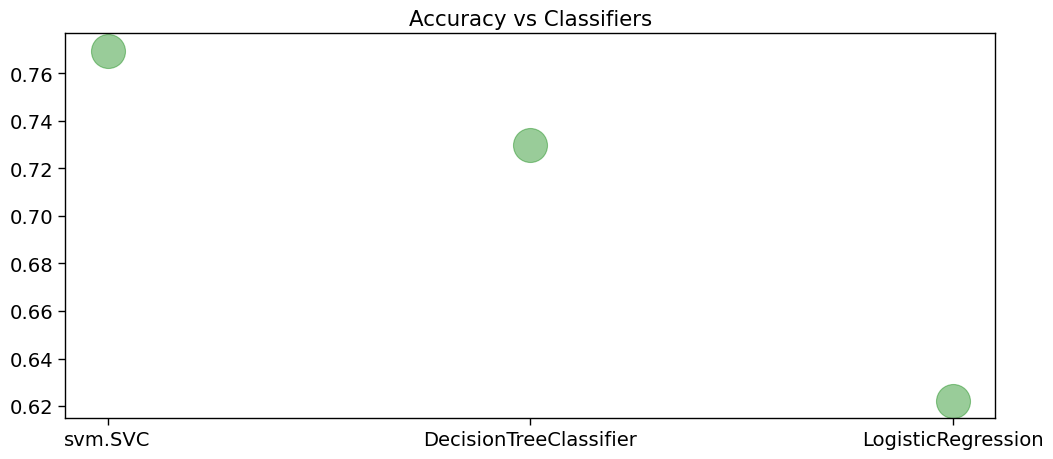

In [243]:
plt.figure(figsize=(12,5))
sns.set_context("paper", font_scale=1.6)
plt.scatter(classifiers, accuracies, s=600, c="green", alpha=0.4)
plt.title('Accuracy vs Classifiers')
plt.show()

In [244]:
## Prediction on entire dataset based on the KNeighborsClassifier model

preds = clf.predict(X)
df1['predicted_restaurant_category'] = preds

In [245]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score', 'saloon_category',
       'predicted_restaurant_category'],
      dtype='object')

In [247]:
from textblob import TextBlob  # Import TextBlob

# Perform sentiment analysis
df1['sentiment_score'] = df1['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display sentiment distribution
print("Sentiment Distribution:")
print(df1['sentiment_score'].describe())

# Categorize sentiments
df1['sentiment_category'] = pd.cut(df1['sentiment_score'], 
                                   bins=[-1, -0.1, 0.1, 1], 
                                   labels=['Negative', 'Neutral', 'Positive'])

print("Sentiment Categories:")
print(df1['sentiment_category'].value_counts(normalize=True))


Sentiment Distribution:
count    12154.000000
mean         0.174024
std          0.256933
min         -1.000000
25%          0.002197
50%          0.173556
75%          0.333333
max          1.000000
Name: sentiment_score, dtype: float64
Sentiment Categories:
Positive    0.613339
Neutral     0.264389
Negative    0.122273
Name: sentiment_category, dtype: float64


In [248]:
df1.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,saloon_category,predicted_restaurant_category,sentiment_score,sentiment_category
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,ulta promo: buy $60 purology get free gift. to...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.316667,Positive
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,let preface review this: picky cut hair. trust...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.091597,Neutral
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,two half star would say. even though store new...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.145725,Positive
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,visited ulta location twice one week. first ti...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.229708,Positive
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,went get eyelash extension benefit cosmetic ba...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,-0.075482,Neutral


In [249]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from collections import Counter
from tabulate import tabulate

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNet"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def get_themes(text):
    words = nltk.word_tokenize(text.lower())
    themes = []
    for word in words:
        synsets = wordnet.synsets(word, pos=get_wordnet_pos(word))
        if synsets:
            themes.append(synsets[0].lemma_names()[0])
    return Counter(themes)

def analyze_brand(df, brand_name):
    # Filter for the specified brand locations
    brand_df = df[df['name'].str.contains(brand_name, case=False, na=False)]
    
    def analyze_group(group):
        themes = get_themes(' '.join(group['cleaned_text']))
        top_themes = themes.most_common(20)
        
        positive_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() > 0]
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        
        return pd.Series({
            'address': group['address'].iloc[0],
            'postal_code': group['postal_code'].iloc[0],
            'business_ratings': round(group['business_ratings'].mean(), 2),
            'strengths': ', '.join(positive_themes[:3]),
            'areas_for_improvement': ', '.join(negative_themes[:3])
        })
    
    # Apply the analysis to each group
    brand_insights = brand_df.groupby('business_id').apply(analyze_group)
    
    # Reset index to make business_id a column
    brand_insights = brand_insights.reset_index()
    
    # Display the results in a tabular format
    print(tabulate(brand_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    # Print summary statistics
    print(f"\
Total {brand_name} locations analyzed: {len(brand_insights)}")
    print(f"Average business rating: {brand_insights['business_ratings'].mean():.2f}")
    print(f"Highest rated location: {brand_insights.loc[brand_insights['business_ratings'].idxmax(), 'address']} (Rating: {brand_insights['business_ratings'].max()})")
    print(f"Lowest rated location: {brand_insights.loc[brand_insights['business_ratings'].idxmin(), 'address']} (Rating: {brand_insights['business_ratings'].min()})")
    
    # Aggregate strengths and areas for improvement
    all_strengths = ', '.join(brand_insights['strengths'].dropna())
    all_improvements = ', '.join(brand_insights['areas_for_improvement'].dropna())
    
    print("\
Common strengths across all locations:")
    print(', '.join(sorted(set(all_strengths.split(', ')))[:9]))  # Top 5 unique strengths
    
    print("\
Common areas for improvement across all locations:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 5 unique areas for improvement

print("Functions modified to be generic.")

Functions modified to be generic.


In [250]:
analyze_brand(df1,'Ulta Beauty')

| business_id            | address                                               |   postal_code |   business_ratings | strengths                         | areas_for_improvement   |
|:-----------------------|:------------------------------------------------------|--------------:|-------------------:|:----------------------------------|:------------------------|
| 3551sOADb1nQr3PFsbqw8A | 8169 Sawyer Brown Rd                                  |         37221 |                2.5 | aid, merchandise, friend          |                         |
| 4uqRhXZTOzKF2ZhxbWzxfA | 2130 Fashion Center Blvd                              |         19702 |                3.5 | hair, get, love                   |                         |
| 9EZ6JKyqirjyE0GGHERmUQ | 8811 Hardegan St, Ste 360, The Shoppes at County Line |         46227 |                3.5 | travel, shop, hair                |                         |
| DJZQCN0NUej_EtviN4rUlg | 7600 City Line Ave, Unit 1                            |        

In [251]:
df['name'].unique()

array(['Ulta Beauty', 'Hair Cuttery', 'Supercuts', 'Great Clips',
       'Sally Beauty Supply', 'Fantastic Sams Cut & Color',
       'Ross Dress for Less', 'Bath & Body Works', "Kohl's", 'Old Navy'],
      dtype=object)

In [252]:
for name in df['name'].unique():
    analyze_brand(df1,name)

| business_id            | address                                               |   postal_code |   business_ratings | strengths                         | areas_for_improvement   |
|:-----------------------|:------------------------------------------------------|--------------:|-------------------:|:----------------------------------|:------------------------|
| 3551sOADb1nQr3PFsbqw8A | 8169 Sawyer Brown Rd                                  |         37221 |                2.5 | aid, merchandise, friend          |                         |
| 4uqRhXZTOzKF2ZhxbWzxfA | 2130 Fashion Center Blvd                              |         19702 |                3.5 | hair, get, love                   |                         |
| 9EZ6JKyqirjyE0GGHERmUQ | 8811 Hardegan St, Ste 360, The Shoppes at County Line |         46227 |                3.5 | travel, shop, hair                |                         |
| DJZQCN0NUej_EtviN4rUlg | 7600 City Line Ave, Unit 1                            |        

| business_id            | address                                                                                   |   postal_code |   business_ratings | strengths                        | areas_for_improvement   |
|:-----------------------|:------------------------------------------------------------------------------------------|--------------:|-------------------:|:---------------------------------|:------------------------|
| -BKUma4mz8uqH30nfOUiyQ | 1924 Bruce B Downs Blvd # 111, Wesley Shoppes At New Tampa                                |         33544 |                2.5 | hair, stylist, appointment       |                         |
| -P4wyB0ncCDoKNpPM3OEkg | 19406 N Bruce B Downs Blvd, Shoppes At Pebble Creek                                       |         33647 |                2.5 | time, haircut, state             |                         |
| 0IMUakyuZWFIauCycbycGA | 4949 4Th St N, Saint Petersburg                                                           |         33703

| business_id            | address                                                              |   postal_code |   business_ratings | strengths                       | areas_for_improvement                |
|:-----------------------|:---------------------------------------------------------------------|--------------:|-------------------:|:--------------------------------|:-------------------------------------|
| -2mctVTqFR5-DDCXKvMNPA | 7002 Lake Plaza Dr, Ste 7002C                                        |         46220 |                3   | iodine, get, great              |                                      |
| -6xYpkvG91ClVz31JjhJCA | 16 Four Seasons Shopping Ctr                                         |         63017 |                4   | hair, cut, great                |                                      |
| -CC4GaKGzXH8PmjhBfx6Pw | 1483 Nashville Pike, Ste 502                                         |         37066 |                2.5 | time, cut, hair                 |

| business_id            | address                      | postal_code   |   business_ratings | strengths                         | areas_for_improvement     |
|:-----------------------|:-----------------------------|:--------------|-------------------:|:----------------------------------|:--------------------------|
| -gUMx-dYFuB5s6vl8ZKQRg | 5801 Calle Real              | 93117         |                3   | customer, get, travel             |                           |
| -vFn6XFWorqcsrF8oOv9-g | 2561 Countryside Blvd, Ste 5 | 33761         |                3.5 | get, shop, hair                   |                           |
| -xGTvUevTzAQXIU3ocNKsg | 78 White Bridge Rd, Ste F4   | 37205         |                3   | travel, aid, get                  |                           |
| 1S73a9K5IP9k0pKf-mgj7Q | 7059 Hwy 70 S                | 37221         |                2.5 | iodine, shop, need                |                           |
| 2Z1HUGYVpWRiO2-S2Ris_Q | 2875 Northtowne Ln,

| business_id            | address                                     |   postal_code |   business_ratings | strengths                          | areas_for_improvement                |
|:-----------------------|:--------------------------------------------|--------------:|-------------------:|:-----------------------------------|:-------------------------------------|
| --_lZuj_WCGnDG6n0emlRg | 700 Haddonfield Berlin Rd                   |         08043 |                2   | shop, iodine, Ross                 |                                      |
| 0_zkJZc4GbOzZlEMYCaOUQ | 4425 N Oracle Rd                            |         85705 |                2   |                                    | Ross, shop, one                      |
| 2jY1cZxE9_RFAJQXQZ62cg | 2234 Route 70 W                             |         08002 |                2.5 |                                    | one, good, Ross                      |
| 55NEsyt6mgvQ3L0WimvpJw | 14941 N Florida Ave                        

| business_id            | address                              | postal_code   |   business_ratings | strengths                             | areas_for_improvement   |
|:-----------------------|:-------------------------------------|:--------------|-------------------:|:--------------------------------------|:------------------------|
| 0MDoieQv9x6aC1tCimO8Mw | 250 Westshore Plaza, Spc B3          | 33609         |                4.5 | shop, love, merchandise               |                         |
| 0bYdVe-ksr9QsVAFJ89BkA | 447 Brandon Town Center              | 33511         |                4   | shop, always, one                     |                         |
| 0xLGh7nWhIMxo8J_M-krMQ | 80 W County Ctr                      | 63131         |                5   | always, gift, shop                    |                         |
| 2vIw_EuAcham4RFKh5ctIw | 1625 Chestnut Street                 | 19103         |                3   | shop, give, coupon                    |             

| business_id            | address                                        | postal_code   |   business_ratings | strengths                     | areas_for_improvement   |
|:-----------------------|:-----------------------------------------------|:--------------|-------------------:|:------------------------------|:------------------------|
| 0Heloc7hdVq1ff1pAW9VWQ | 140 Commerce Blvd                              | 19030         |                2   |                               | old, navy, shop         |
| 0kE6ONRsxXF44QLvEUyr2A | 6075 Wesley Grove Blvd                         | 33544         |                3   | old, shop, navy               |                         |
| 1Iy3OW9Emh_GCW-jfDwWfA | 400 S State Rd                                 | 19064         |                2   | shop, check, get              |                         |
| 282otDb5j0_ZIWoezntTYg | 14250 Clay Terrace Blvd, Ste 180               | 46032         |                3.5 | old, navy, shop               | 

In [254]:
import string  # Import the string module
import random  # Import the random module

distinct_brands = df1['name'].unique()

# Function to generate a random password
def generate_password(length=8):
    characters = string.ascii_letters + string.digits + string.punctuation
    return ''.join(random.choice(characters) for i in range(length))

# Create a dictionary to store usernames and passwords for each brand
credentials = {}

# Generate username and password for each brand
for brand in distinct_brands:
    username = brand.replace(" ", "_").lower()  # Replace spaces with underscores and convert to lowercase
    password = generate_password()
    credentials[brand] = {'username': username, 'password': password}

# Now, 'credentials' dictionary will contain usernames and passwords for each brand


In [255]:
df1.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,saloon_category,predicted_restaurant_category,sentiment_score,sentiment_category
0,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,ulta promo: buy $60 purology get free gift. to...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.316667,Positive
1,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,let preface review this: picky cut hair. trust...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.091597,Neutral
2,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,two half star would say. even though store new...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.145725,Positive
3,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,visited ulta location twice one week. first ti...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,0.229708,Positive
4,2130 Fashion Center Blvd,4uqRhXZTOzKF2ZhxbWzxfA,Newark,39.672058,-75.6489,Ulta Beauty,19702,-0.441966,3.5,DE,...,went get eyelash extension benefit cosmetic ba...,3.55,0.09,100.0,0.0,0.0,Awesome,Awesome,-0.075482,Neutral


In [256]:
from textblob import TextBlob

# Given words
words = ["service", "slow", "haircut", "amazing", "ambience", "great"]

# Step 1: Define a mapping of categories to descriptive words
category_descriptions = {
    "service": [],
    "haircut": [],
    "ambience": []
}

# Step 2: Associate descriptive words with categories
# Update these mappings with salon-related keywords
category_keywords = {
    "service": ["slow", "poor", "good", "excellent"],
    "haircut": ["amazing", "bad", "stylish", "perfect"],
    "ambience": ["great", "pleasant", "bad", "cozy"]
}

# Populate the category descriptions
for word in words:
    for category, keywords in category_keywords.items():
        if word in keywords:
            category_descriptions[category].append(word)

# Step 3: Analyze Sentiment for Each Category
aspect_sentiments = {}
for category, descriptions in category_descriptions.items():
    combined_description = " ".join(descriptions)
    analysis = TextBlob(combined_description)
    sentiment = analysis.sentiment.polarity
    aspect_sentiments[category] = sentiment

# Step 4: Generate a Summary Report
def generate_report(aspect_sentiments):
    report = []
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment > 0:
            report.append(f"The {aspect} is positive with a sentiment score of {sentiment:.2f}.")
        elif sentiment < 0:
            report.append(f"The {aspect} needs improvement with a sentiment score of {sentiment:.2f}.")
        else:
            report.append(f"The {aspect} feedback is neutral.")
    return "\n".join(report)

# Generate and print the report
report = generate_report(aspect_sentiments)
print(report)


The service needs improvement with a sentiment score of -0.30.
The haircut is positive with a sentiment score of 0.60.
The ambience is positive with a sentiment score of 0.80.
